In [1]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("train/angry/Training_3908.jpg")

In [5]:
img_array.shape

(48, 48, 3)

In [7]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


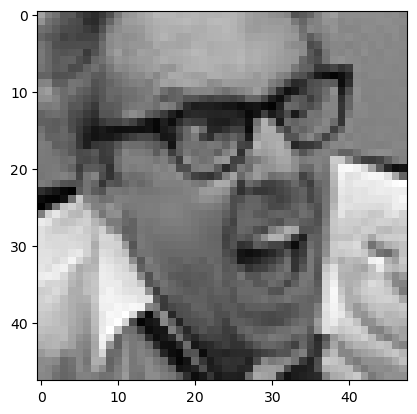

In [9]:
plt.imshow(img_array)

In [11]:
DataDirectory = "train/"

In [13]:
Classes = ["angry", "disgust", "fear", "happy" , "neutral", "sad", "surprise"]

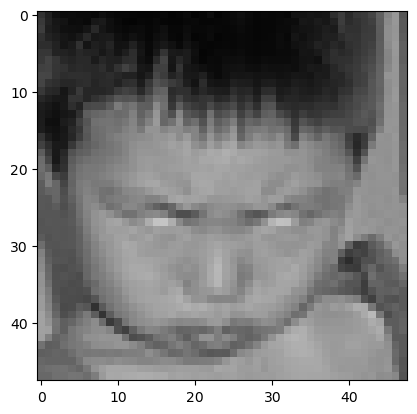

In [15]:
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        

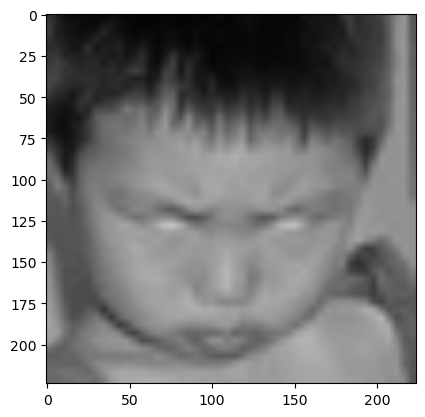

In [17]:
img_size= 224
new_array= cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
                

In [21]:
create_training_Data()

In [23]:
print(len(training_Data))

28709


In [25]:
temp = np.array(training_Data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (28709, 2) + inhomogeneous part.

In [28]:
import random

random.shuffle(training_Data)

In [30]:
X = []
Y = []

for features,label in training_Data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [74]:
X.shape

(28709, 224, 224, 3)

In [76]:
X= X/255;

MemoryError: Unable to allocate 32.2 GiB for an array with shape (28709, 224, 224, 3) and data type float64

In [78]:
Y[1]

6

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
model = tf.keras.applications.MobileNetV2()

In [83]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [86]:
base_input = model.layers[1].input

In [88]:
base_output = model.layers[-2].output

In [90]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_315>

In [92]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation="softmax")(final_output)

In [94]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_321>

In [96]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [98]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [64]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
new_model.fit(X,Y, epochs = 25)

ValueError: Unrecognized data type: x=[[[[0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.29803922 0.29803922 0.29803922]
   [0.30196078 0.30196078 0.30196078]
   [0.30196078 0.30196078 0.30196078]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.29411765 0.29411765 0.29411765]
   [0.29803922 0.29803922 0.29803922]
   [0.29803922 0.29803922 0.29803922]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.29411765 0.29411765 0.29411765]
   [0.29803922 0.29803922 0.29803922]
   [0.29803922 0.29803922 0.29803922]]]


 [[[0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   ...
   [0.20392157 0.20392157 0.20392157]
   [0.20392157 0.20392157 0.20392157]
   [0.20392157 0.20392157 0.20392157]]

  [[0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   [0.20784314 0.20784314 0.20784314]
   ...
   [0.20392157 0.20392157 0.20392157]
   [0.20392157 0.20392157 0.20392157]
   [0.20392157 0.20392157 0.20392157]]

  [[0.21176471 0.21176471 0.21176471]
   [0.21176471 0.21176471 0.21176471]
   [0.20784314 0.20784314 0.20784314]
   ...
   [0.20392157 0.20392157 0.20392157]
   [0.20392157 0.20392157 0.20392157]
   [0.20392157 0.20392157 0.20392157]]

  ...

  [[0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   [0.0627451  0.0627451  0.0627451 ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]]


 [[[0.50980392 0.50980392 0.50980392]
   [0.50980392 0.50980392 0.50980392]
   [0.50588235 0.50588235 0.50588235]
   ...
   [0.22745098 0.22745098 0.22745098]
   [0.22745098 0.22745098 0.22745098]
   [0.22745098 0.22745098 0.22745098]]

  [[0.50980392 0.50980392 0.50980392]
   [0.50980392 0.50980392 0.50980392]
   [0.50588235 0.50588235 0.50588235]
   ...
   [0.22745098 0.22745098 0.22745098]
   [0.22745098 0.22745098 0.22745098]
   [0.22745098 0.22745098 0.22745098]]

  [[0.50588235 0.50588235 0.50588235]
   [0.50588235 0.50588235 0.50588235]
   [0.50588235 0.50588235 0.50588235]
   ...
   [0.22745098 0.22745098 0.22745098]
   [0.22745098 0.22745098 0.22745098]
   [0.22745098 0.22745098 0.22745098]]

  ...

  [[0.18431373 0.18431373 0.18431373]
   [0.18431373 0.18431373 0.18431373]
   [0.18431373 0.18431373 0.18431373]
   ...
   [0.17254902 0.17254902 0.17254902]
   [0.17254902 0.17254902 0.17254902]
   [0.17254902 0.17254902 0.17254902]]

  [[0.18039216 0.18039216 0.18039216]
   [0.18039216 0.18039216 0.18039216]
   [0.18039216 0.18039216 0.18039216]
   ...
   [0.17254902 0.17254902 0.17254902]
   [0.17254902 0.17254902 0.17254902]
   [0.17254902 0.17254902 0.17254902]]

  [[0.18039216 0.18039216 0.18039216]
   [0.18039216 0.18039216 0.18039216]
   [0.18039216 0.18039216 0.18039216]
   ...
   [0.17254902 0.17254902 0.17254902]
   [0.17254902 0.17254902 0.17254902]
   [0.17254902 0.17254902 0.17254902]]]


 ...


 [[[0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   ...
   [0.89803922 0.89803922 0.89803922]
   [0.89803922 0.89803922 0.89803922]
   [0.89803922 0.89803922 0.89803922]]

  [[0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   ...
   [0.89803922 0.89803922 0.89803922]
   [0.89803922 0.89803922 0.89803922]
   [0.89803922 0.89803922 0.89803922]]

  [[0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   [0.92941176 0.92941176 0.92941176]
   ...
   [0.89803922 0.89803922 0.89803922]
   [0.89803922 0.89803922 0.89803922]
   [0.89803922 0.89803922 0.89803922]]

  ...

  [[0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   ...
   [0.25882353 0.25882353 0.25882353]
   [0.25098039 0.25098039 0.25098039]
   [0.25098039 0.25098039 0.25098039]]

  [[0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   ...
   [0.25490196 0.25490196 0.25490196]
   [0.24705882 0.24705882 0.24705882]
   [0.24705882 0.24705882 0.24705882]]

  [[0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   [0.19215686 0.19215686 0.19215686]
   ...
   [0.25490196 0.25490196 0.25490196]
   [0.24705882 0.24705882 0.24705882]
   [0.24705882 0.24705882 0.24705882]]]


 [[[0.6745098  0.6745098  0.6745098 ]
   [0.6745098  0.6745098  0.6745098 ]
   [0.6745098  0.6745098  0.6745098 ]
   ...
   [0.40784314 0.40784314 0.40784314]
   [0.40392157 0.40392157 0.40392157]
   [0.40392157 0.40392157 0.40392157]]

  [[0.6745098  0.6745098  0.6745098 ]
   [0.6745098  0.6745098  0.6745098 ]
   [0.6745098  0.6745098  0.6745098 ]
   ...
   [0.40784314 0.40784314 0.40784314]
   [0.40392157 0.40392157 0.40392157]
   [0.40392157 0.40392157 0.40392157]]

  [[0.6745098  0.6745098  0.6745098 ]
   [0.6745098  0.6745098  0.6745098 ]
   [0.67843137 0.67843137 0.67843137]
   ...
   [0.41176471 0.41176471 0.41176471]
   [0.40784314 0.40784314 0.40784314]
   [0.40784314 0.40784314 0.40784314]]

  ...

  [[0.49019608 0.49019608 0.49019608]
   [0.49019608 0.49019608 0.49019608]
   [0.48627451 0.48627451 0.48627451]
   ...
   [0.45490196 0.45490196 0.45490196]
   [0.45490196 0.45490196 0.45490196]
   [0.45490196 0.45490196 0.45490196]]

  [[0.49019608 0.49019608 0.49019608]
   [0.49019608 0.49019608 0.49019608]
   [0.48627451 0.48627451 0.48627451]
   ...
   [0.45490196 0.45490196 0.45490196]
   [0.45882353 0.45882353 0.45882353]
   [0.45882353 0.45882353 0.45882353]]

  [[0.49019608 0.49019608 0.49019608]
   [0.49019608 0.49019608 0.49019608]
   [0.48627451 0.48627451 0.48627451]
   ...
   [0.45490196 0.45490196 0.45490196]
   [0.45882353 0.45882353 0.45882353]
   [0.45882353 0.45882353 0.45882353]]]


 [[[0.24313725 0.24313725 0.24313725]
   [0.24313725 0.24313725 0.24313725]
   [0.24313725 0.24313725 0.24313725]
   ...
   [0.23921569 0.23921569 0.23921569]
   [0.23921569 0.23921569 0.23921569]
   [0.23921569 0.23921569 0.23921569]]

  [[0.24313725 0.24313725 0.24313725]
   [0.24313725 0.24313725 0.24313725]
   [0.24313725 0.24313725 0.24313725]
   ...
   [0.23921569 0.23921569 0.23921569]
   [0.23921569 0.23921569 0.23921569]
   [0.23921569 0.23921569 0.23921569]]

  [[0.24313725 0.24313725 0.24313725]
   [0.24313725 0.24313725 0.24313725]
   [0.24313725 0.24313725 0.24313725]
   ...
   [0.23921569 0.23921569 0.23921569]
   [0.23921569 0.23921569 0.23921569]
   [0.23921569 0.23921569 0.23921569]]

  ...

  [[0.32156863 0.32156863 0.32156863]
   [0.32156863 0.32156863 0.32156863]
   [0.32156863 0.32156863 0.32156863]
   ...
   [0.29019608 0.29019608 0.29019608]
   [0.28235294 0.28235294 0.28235294]
   [0.28235294 0.28235294 0.28235294]]

  [[0.32156863 0.32156863 0.32156863]
   [0.32156863 0.32156863 0.32156863]
   [0.32156863 0.32156863 0.32156863]
   ...
   [0.29019608 0.29019608 0.29019608]
   [0.28235294 0.28235294 0.28235294]
   [0.28235294 0.28235294 0.28235294]]

  [[0.32156863 0.32156863 0.32156863]
   [0.32156863 0.32156863 0.32156863]
   [0.32156863 0.32156863 0.32156863]
   ...
   [0.29019608 0.29019608 0.29019608]
   [0.28235294 0.28235294 0.28235294]
   [0.28235294 0.28235294 0.28235294]]]] (of type <class 'numpy.ndarray'>)

In [108]:
new_model.save('Final_model_95p07.keras')

In [110]:
new_model = tf.keras.models.load_model('Final_model_95p07.keras')

In [114]:
frame = cv2.imread("happy.jpg")

In [116]:
frame.shape

(1690, 1600, 3)

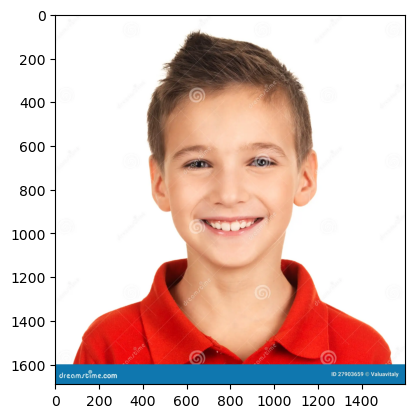

In [120]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [122]:
caseCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [124]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [126]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]   

IndentationError: unexpected indent (3163457420.py, line 2)

In [129]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in the box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcamera")

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]           
                final_image = cv2.resize(face_roi, (224,224))
                final_image = np.expand_dims(final_image, axis =0)
                final_image = final_image/255.0
    
                font = cv2.FONT_HERSHEY_SIMPLEX
                Predictions = new_model.predict(final_image)
                font_scale = 1.5
                font = cv2.FONT_HERSHEY_PLAIN

                if (np.argmax(Predictions)==0):
                    status = "Angry"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

                elif (np.argmax(Predictions)==1):
                    status = "Disgust"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

                elif (np.argmax(Predictions)==2):
                    status = "Fear"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

                elif (np.argmax(Predictions)==3):
                    status = "Happy"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

                elif (np.argmax(Predictions)==4):
                    status = "Sad"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

                elif (np.argmax(Predictions)==5):
                    status = "Surpise"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

                else:
                    status = "Neutral"
                    x1,y1,w1,h1 = 0,0,175,75
                    cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1)
                    cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    cv2.imshow("Face Emotion recognition",frame)    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Face n

KeyboardInterrupt: 